**Анализ продаж компьютерных игр по всему миру**

**Цель:** На основе данных о продажах игр в интернет-магазине выявить определяющие успешность игры закономерности (оценки пользователей, жанры, платформы) для планирования рекламной кампании на 2017 год.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [ ]:
data = pd.read_csv('/datasets/games.csv')

## Шаг 2. Подготовьте данные

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Замените названия столбцов (приведите к нижнему регистру)

In [ ]:
data.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
                'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Изменение типов данных

Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [ ]:
data['year_of_release'].isna().sum()

269

In [ ]:
data = data.dropna(subset = ['year_of_release'])
data['year_of_release'] = data['year_of_release'].astype('int')

In [ ]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'] = pd.to_numeric(data['user_score'])

### Обработка пропусков

Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

In [ ]:
data.loc[data['name'].isna() | data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [ ]:
data = data.loc[~data['name'].isna() | ~data['genre'].isna()]

In [ ]:
data.loc[data['critic_score'].isna() & data['user_score'].isna() & data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
data.loc[data['critic_score'].isna() & data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
data['rating'] = data['rating'].fillna('unknown')

data.duplicated().sum()

0

### Создание нового столбца

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [ ]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

data = data.reset_index(drop=True)

<div class="alert alert-info">
   Заменили тип данных в столбце 'year_of_release' на int, т.к. год - целое число. Пропуски в данном столбце мы не можем заменить медианой/средним, т.к. это не количественная переменная и таких строк 269, что относительно небольшое число - удалим эти строки.
    В столбце 'user_score' мы меняем значение с object на float, т.к. это количественное значение и понадобится для рассчётов и построения графиков. Значение 'tbd' в данном столбце означает to be determined (подлежит определению), т.е. неизвестно, значит меняем их на NaN.
    Выяснили, что пропуски в столбцах 'name' и 'genre' совпадают и имеют пропуски в трёх последних столбцах, удалим их.
    После вывода совпадающих пропусков в трех последних столбцах мы видим, что 6580 пропусков в 'rating' совпадают с пропусками в 'user_score' и 'critic_score'. Это может говорить о сбое при выгрузке данных, либо отсутствии данных об этих играх.
    Т.к. 'rating' - категориальная переменная, заменим пропуски значением 'unknown'. Оценки игроков и критиков - величина, которая определяется человеком, поэтому заполнение медианой/средним может изменить реальную картину, к тому же, 7982 из 8461 пропуска совпадают. Оставим эти пропуски.
       

## Шаг 3. Проведите исследовательский анализ данных

### Выпуск игр по годам

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

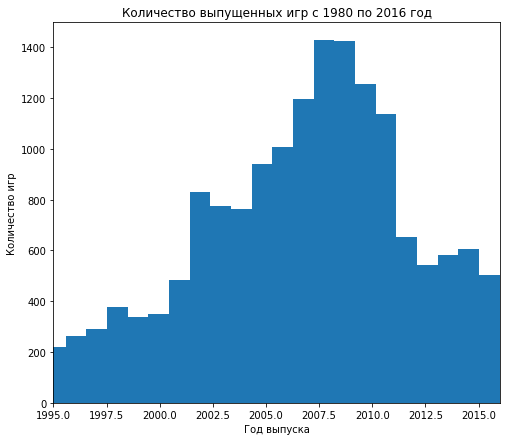

In [ ]:
data['year_of_release'].plot(kind='hist', bins=37, title='Количество выпущенных игр с 1980 по 2016 год', figsize=(8,7))
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.xlim(1995, 2016);

<div class="alert alert-info"> По графику частоты значений года в датасете видим, что скачок случился после 1995 года и основная масса игр выпущена уже после 2000 года.

### Динамика продаж по платформам

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

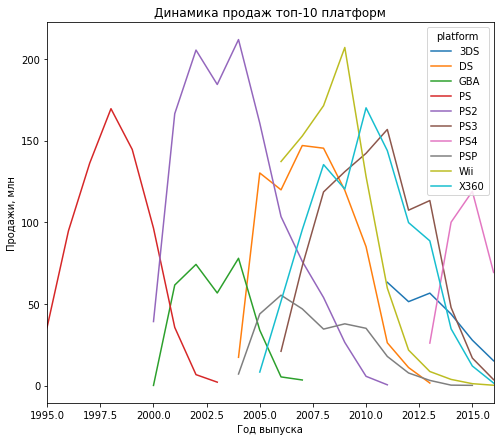

In [ ]:
top_10 = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).head(10)

data.query('platform in @top_10.index').pivot_table(index='year_of_release', columns='platform',
                values='total_sales', aggfunc='sum').plot(title='Динамика продаж топ-10 платформ', figsize=(8,7))
plt.xlabel('Год выпуска')
plt.ylabel('Продажи, млн')
plt.xlim(1995, 2016);

In [ ]:
platform_period = data.groupby('platform').agg({'year_of_release':'nunique'})
platform_period

,year_of_release
platform,
2600,10
3DO,2
3DS,6
DC,7
DS,11
GB,13
GBA,8
GC,7
GEN,5


In [ ]:
platform_period.median()

year_of_release    7.0
dtype: float64

<div class="alert alert-info"> Сгруппировав общий датасет по сумме продаж за все года по отдельным платформам, выявили топ-10 самых успешных. По выборке данных из основного датасета по этим 10 платформам построили график динамики их успешности. На графике видно, что средний срок жизни платформы - 6-8 лет. Среди новых игроков рынка 'PS4', о которой мы имеем пока недостаточно данных, поэтому её в рассчёт также не берем. Основная масса успешных платформ с 2000 по 2015 год имеет срок жизни от 6 до 8 лет.

### Выборка актуальных данных

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

<div class="alert alert-info"> Выборка делается, исходя из нескольких факторов:
 - отметаем данные до 2000 года, т.к. оба графика выше доказывают их неактуальность;
 - планируется делать прогноз на 2017 год, поэтому важно учитывать динамику активных на текущий момент платформ. Мы видим PS4, которая вышла в конце 2013 года и DS, которая перестаёт быть актуальной примерно в тоже время. Соответственно, целесообразно будет взять выборку с этого момента, но для удобства будем считать с начала 2014 года;

In [ ]:
data = data.query('year_of_release > 2013')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


### Динамика продаж актуальных платформ

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

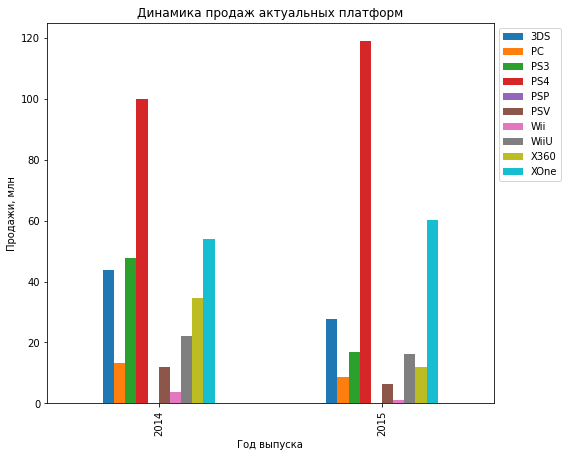

In [ ]:
data.query('2016 > year_of_release').pivot_table(index='year_of_release', columns='platform', values='total_sales',
                            aggfunc='sum').plot(kind='bar', title='Динамика продаж актуальных платформ', figsize=(8,7))
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.xlabel('Год выпуска')
plt.ylabel('Продажи, млн');

<div class="alert alert-info"> Для выявления потенциально успешных платформ по объёму продаж мы убрали 2016 год из рассчёта, т.к. если данные не полные, то продажи могут быть очень низкими, что исказит реальность. На графике видим, что рост наблюдается у двух платформ PS4 и XOne. Заметный спад у 3DS, PS3, X360. Другие платформы имеют стабильные продажи, но они не похожи на бестселлеры по объемам продаж.

### Показатели глобальных продаж разных актуальных платформ

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

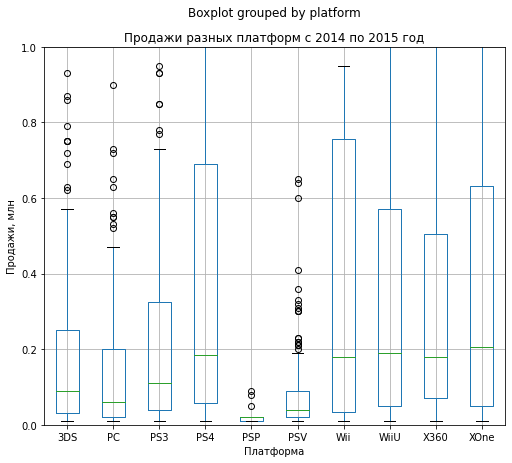

In [ ]:
data.boxplot(column='total_sales', by='platform', figsize=(8,7))
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн')
plt.ylim(0, 1)
plt.title('Продажи разных платформ с 2014 по 2015 год');

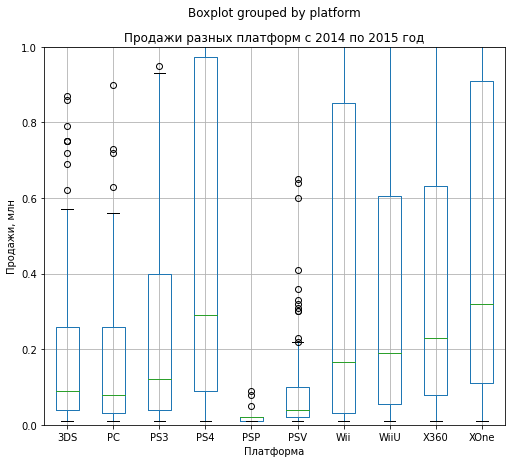

In [ ]:
data.query('year_of_release < 2016').boxplot(column='total_sales', by='platform', figsize=(8,7))
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн')
plt.ylim(0, 1)
plt.title('Продажи разных платформ с 2014 по 2015 год');

<div class="alert alert-info"> Сгруппировав показатели глобальных продаж игр по платформам, можем увидеть, что выделяются 5 платформ-бестселлеров с 2014 по 2016 год и те же платформы лидируют и без показателей 2016 года. Это PS4, Wii, WiiU, X360 и XOne. Минимальные показатели у PSP. Есть большое количество выбросов почти у всех 5 популярных платформ, но это не влияет на медиану, которая говорит о небольших различиях среди средних показателей продаж игр у этих платформ. PS4 вышла позже всех, что объясняет выдающиеся показатели продаж. Отличие в выбросах между платформами в среднем не сильно значительное, что значит, что у всех платформ есть как выдающиеся игры, так и средние по популярности.

### Зависимость продаж PS4 от отзывов критиков и пользователей

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

0.40266141068104083

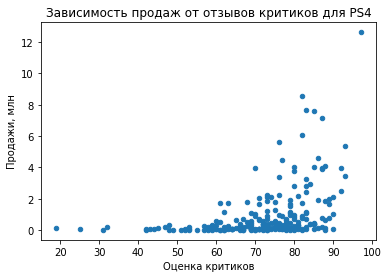

In [ ]:
data.query('platform == "PS4"').plot(y='total_sales', x='critic_score',
                                     kind='scatter', title='Зависимость продаж от отзывов критиков для PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, млн')
data.query('platform == "PS4"')['total_sales'].corr(data.query('platform == "PS4"')['critic_score'])

-0.040131589472697356

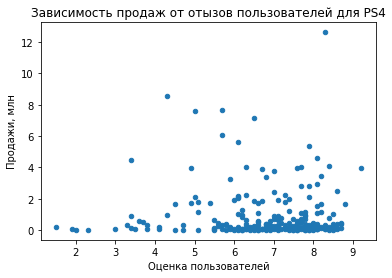

In [ ]:
data.query('platform == "PS4"').plot(y='total_sales', x='user_score',
                                     kind='scatter', title='Зависимость продаж от отызов пользователей для PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, млн')
data.query('platform == "PS4"')['total_sales'].corr(data.query('platform == "PS4"')['user_score'])

  <div class="alert alert-info"> Для анализа зависимости мы взяли PS4 - самую выдающуюся по показателям платформу. Из графика зависимости продаж от оценки критиков мы видим, что основная часть значений расположилась в зоне больше 40. Однако уже в этой зоне видно, что зависимость не такая сильная, т.к. продажи стабильно сосредоточены в пределах 10 милионов, вне зависимости от оценки, и количество игр с более высокими продажами уже не такое большое. Что касается влияния оценки пользователей на продажи, то здесь коэффициент -0.4 говорит об отсутствии связи между этими показателями.

### Сравнение PS4 с другими лидерами рынка

Соотнесите выводы с продажами игр на других платформах.

0.42867694370333226

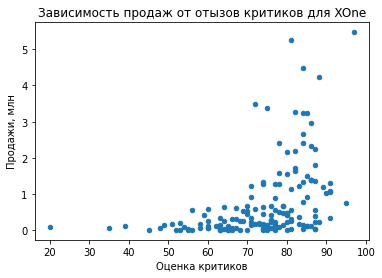

In [ ]:
data.query('platform == "XOne"').plot(y='total_sales', x='critic_score',
                                      kind='scatter', title='Зависимость продаж от отызов критиков для XOne')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, млн')
data.query('platform == "XOne"')['total_sales'].corr(data.query('platform == "XOne"')['critic_score'])

-0.0703839280647581

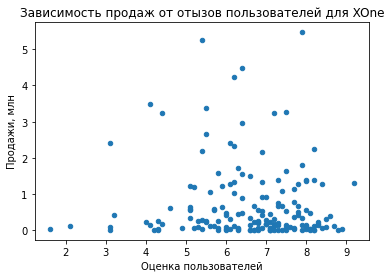

In [ ]:
data.query('platform == "XOne"').plot(y='total_sales', x='user_score',
                                      kind='scatter', title='Зависимость продаж от отызов пользователей для XOne')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, млн')
data.query('platform == "XOne"')['total_sales'].corr(data.query('platform == "XOne"')['user_score'])

  <div class="alert alert-info"> Для сравнения зависимостей взяли вторую потенциально успешную платформу XOne. Здесь почти такая же зависимость уровня продаж от критиков, отличается на 0.02, что значит, что связь между этими двумя величинами очень слаба. По графику можно отметить, что пользователи XOne чуть чаще покупают игры с высокой оценкой, т.к. величины больше распределены на графике, чем величины на графике PS4. О зависимости продаж от оценки пользователей можно сказать тоже самое, что и в случае с PS4, коэффициент корреляции отрицательный, что говорит об отсутствии связи между этими величинами.

  <div class="alert alert-info"> Можно сделать вывод о том, что оценки пользователей и критиков не оказывают значительного влияния на показатели продаж успешных платформ.

### Распределение продаж по жанрам

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

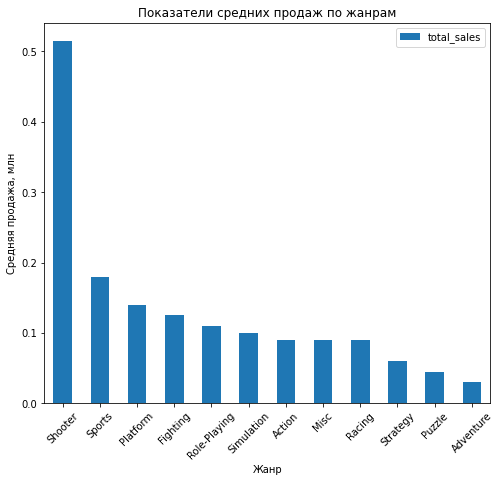

In [ ]:
data.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'median']).sort_values(
    by=('median', 'total_sales'), ascending=False).plot(kind='bar',
            y='median', title='Показатели средних продаж по жанрам', figsize=(8, 7))
plt.xlabel('Жанр')
plt.ylabel('Средняя продажа, млн')
plt.xticks(rotation=45);

  <div class="alert alert-info"> Самое большое количество игр жанра Action, но по продажам этот жанр на 7 месте. Следующий по количеству жанр Role-playing, который занимет 5 место в топе продаж. А вот жанр Adventure на 3 месте по количеству, но на последнем месте по продажам. По распределению видно, что количество выпущенных игр в жанре не влияет на его продаваемость. Топ-5 жанров со стабильно высокими продажами: Shooter, Sports, Platform, Fighting, Role-Playing. Нужно отметить, что у Shooter достаточно большой отрыв.

  <div class="alert alert-info"> Вывод: при выборе платформы стоит помнить и 5-ти самых популярных платформах на рынке (PS4, Xbox One, X360, Wii, WiiU). Из них, показывают рост продаж и являются потенциально успешными Xbox One и PS4. Не стоит учитывать только оценки пользователей и экспертов, стоит рассматривать их в совокупности с другими показателями. Например, жанр. Т.к. количество игр в жанре не влияет на успешность их продаж, то этот фактор вряд ли стоит расмматривать. Стоит обратить внимание на жанры Shooter, Sports, Platform, Fighting, Role-Playing, которые показали стабильно высокие средние продажи.

## Шаг 4. Составьте портрет пользователя каждого региона (NA, EU, JP)

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Пользователи региона NA

<AxesSubplot:title={'center':'Топ-5 популярных платформ в Северной Америке'}, ylabel='na_sales'>

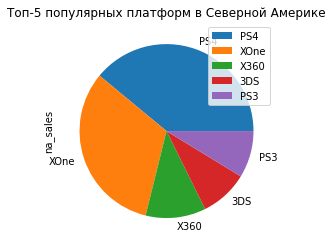

In [ ]:
data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending=False).head(5).plot(kind='pie', y='na_sales', title='Топ-5 популярных платформ в Северной Америке')

<div class="alert alert-info"> На графике распределения доль продаж игр топ-5 популярных платформ в Северной Америке видим двух лидеров рынка: PS4 и XOne, о чём нам также сказали показатели глобального рынка. На втором месте с примерно одинаковыми долями расположились платформы X360, 3DS, PS3. Заметим, что на в топе нет платформ Wii и WiiU, как на глобальном рынке.

<AxesSubplot:title={'center':'Топ-5 популярных жанров в Северной Америке'}, ylabel='na_sales'>

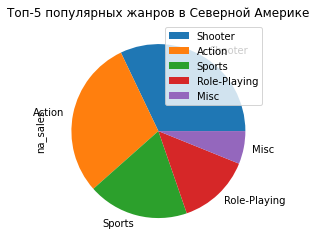

In [ ]:
data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending=False).head(5).plot(kind='pie', y='na_sales', title='Топ-5 популярных жанров в Северной Америке')

<div class="alert alert-info"> В топ-5 жанров в Северной Америке очти наравне лидируют Shooter и Action, далее - Sports, Role-Playing и Misc.

<AxesSubplot:title={'center':'Топ-5 популярных категорий игр в Северной Америке'}, ylabel='na_sales'>

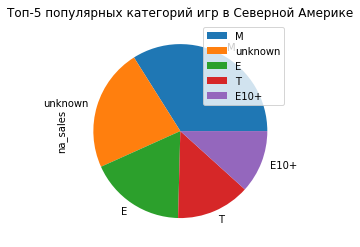

In [ ]:
data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales',
        ascending=False).head(5).plot(kind='pie', y='na_sales', title='Топ-5 популярных категорий игр в Северной Америке')

<div class="alert alert-info"> Что касается рейтинга, то сложно делать выводы по данному графику, т.к. почти четверь игр имеет пропуски в этом столбце. Возможно, данных по рейтингу нет для игр, выпущенных вне Северной Америки, т.к. рейтинг распространяется преимущественно на американские игры. Можно сказать, что около 20%, т.е. каждый пятый покупает игру без рейтинга ESRB.

### Пользователи региона EU

<AxesSubplot:title={'center':'Топ-5 популярных платформ в Европе'}, ylabel='eu_sales'>

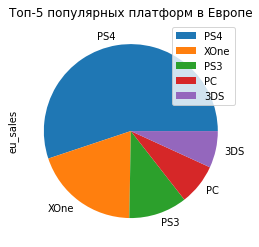

In [ ]:
data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending=False).head(5).plot(kind='pie', y='eu_sales', title='Топ-5 популярных платформ в Европе')

<div class="alert alert-info"> На европейском рынке лидером является PS4, со значительным отрывом на втором месте расположился XOne. Менее популярными являются платформы PS3, PC и 3DS. Также в рейтинге нет платформ Wii и WiiU.

<AxesSubplot:title={'center':'Топ-5 популярных жанров в Европе'}, ylabel='eu_sales'>

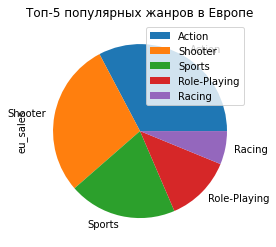

In [ ]:
data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending=False).head(5).plot(kind='pie', y='eu_sales', title='Топ-5 популярных жанров в Европе')

<div class="alert alert-info"> На рынке европы топ-5 популярных жанров совпадает с рейтингом глобального рынка по первым 4 жанрам: Action наравне (с небольшим отрывом) с Shooter, Sports занимает 3 место(его доля визуально чуть больше доли Sports в NA рейтинге), на 4 месте Role-Playing. На 5 месте же, в отличии от NA, здесь расположился жанр Racing.

<AxesSubplot:title={'center':'Топ-5 популярных категорий игр в Европе'}, ylabel='eu_sales'>

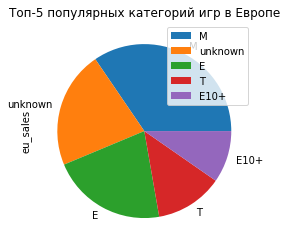

In [ ]:
data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending=False).head(5).plot(kind='pie', y='eu_sales', title='Топ-5 популярных категорий игр в Европе')

<div class="alert alert-info"> По возрастным категориям в европе также большая доля пропусков, можно сказать, что рейтинг ESRB схоже влияет на продажи в европе и Америке. Из того, что видно на графике - как и в Америке, в рейтинге лидирует категория 17+, доля игр для всех возрастов здесь чуть больше, чем в Америке, но также опережает категории от 10 и от 13 лет, которые занимают 4 и 5 место в рейтинге.

### Пользователи региона JP

<AxesSubplot:title={'center':'Топ-5 популярных платформ в Японии'}, ylabel='jp_sales'>

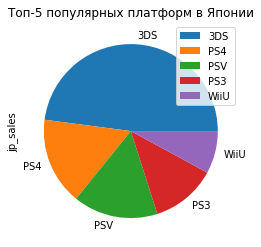

In [ ]:
data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales', ascending=False).head(5).plot(kind='pie', y='jp_sales', title='Топ-5 популярных платформ в Японии')

<div class="alert alert-info"> Рейтинг Японии сильно отличается от рейтингов других регионов. XOne вообще отсутствует в рейтинге, в лидерах - 3DS с большим отрывом (почти 50%). Другие 50% занимают PS4, PSV, PS3 в равных долях и на последнем месте WiiU.

<AxesSubplot:title={'center':'Топ-5 популярных жанров в Японии'}, ylabel='jp_sales'>

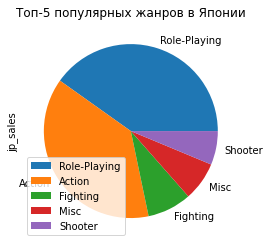

In [ ]:
data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales', ascending=False).head(5).plot(kind='pie', y='jp_sales', title='Топ-5 популярных жанров в Японии')

<div class="alert alert-info"> Что касется жанров, то японские пользователи больше предпочитают Role-Playing или Action (эти жанры занимают около 70% графика). Остальную часть почти поровну делять Shooter, Misc и Fighting.

<AxesSubplot:title={'center':'Топ-5 популярных категорий игр в Японии'}, ylabel='jp_sales'>

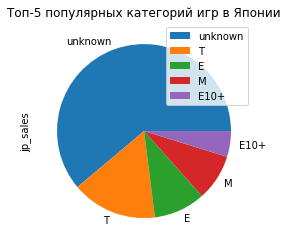

In [ ]:
data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales', ascending=False).head(5).plot(kind='pie', y='jp_sales', title='Топ-5 популярных категорий игр в Японии')

<div class="alert alert-info"> График распределения категорий игр показывает, что около 60% игр, купленных японскими пользователями - не имеют рейтинга ESRB, т.е. он почти не имеет влияния. Из других категорий видно, что лидируют игры 13+, далее - игры для всех возрастов, потом игры 17+ и на последнем месте - 10+. Предпочтения японских пользователей отличаются от предпочтений американцев и европейцев.

## 📊 Шаг 5. Проверьте гипотезы
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

### 📊 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Если H_0: **"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"**,
значит H_1(альтернативная гипотеза), противоположная H_0 по значению, будет
H_1: **"Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые"**.

Для проверки гипотез мы будем брать две выборки из общих данных:
- совокупность значений рейтингов пользователей платформы PC;
- совокупность значений рейтингов пользователей платформы Xbox One;

Параметр дисперсии установим False, т.к. неизвестно, какие дисперсии у этих совокупностей и равны ли они.

In [ ]:
pc_score = data[data['platform'] =='PC']['user_score'].dropna()
xone_score = data[data['platform'] =='XOne']['user_score'].dropna()
results = st.ttest_ind(pc_score, xone_score, equal_var=False)

alpha = 0.01

print('p-значение', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

<div class="alert alert-info"> Статистический тест по двум совокупностям показал, что верояность (p-value) того, что средняя случайная величина совокупности PC будет равна средней случайной величине совокупности XOne 11%, что не позволяет отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, т.к. эта вероятность выше, чем заданный уровень статистической значимости.


### 📊 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**5.2. Средние пользовательские рейтинги жанров Action и Sports разные**

Если H_0: **"Средние пользовательские рейтинги жанров Action и Sports равны"** (т.к. нулевая гипотеза всегда основывается на равенстве), значит H_1(альтернативная гипотеза), противоположная H_0 по значению, будет
H_1: **"Средние пользовательские рейтинги жанров Action и Sports разные"**.

Для проверки гипотез мы будем брать две выборки из общих данных:
- совокупность значений пользовательских оценок игр жанра Action;
- совокупность значений пользовательских оценок игр жанра Sports;

Параметр дисперсии установим False, т.к. неизвестно, какие дисперсии у этих совокупностей и равны ли они, к тому же, они отличаются размером.  

In [ ]:
action_score = data[data['genre'] =='Action']['user_score'].dropna()
sports_score = data[data['genre'] =='Sports']['user_score'].dropna()
results = st.ttest_ind(action_score, sports_score, equal_var=False)

alpha = 0.01

print('p-значение', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 1.1825550382644557e-14
Отвергаем нулевую гипотезу


<div class="alert alert-info"> Статистический тест показал, что верояность того, что средняя случайная величина из action будет равна средней случайной величине из sports имеет отрицательное значение, что отвергает нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports равны, т.к. эта вероятность ниже, чем заданный уровень статистической значимости.

## Шаг 6. Вывод

Напишите общий вывод

Было проведено исследование данных о продажах игр на мировом рынке с 1985 года по 2016 год.

**Цель исследования:** найти закономерности, определяющие успешность игр и выявить потенциально популярный продукт для будущих рекламных компаний на 2017 год.

1. В процессе **обработки данных**, на основе динамики продаж по топ-10 успешным платформам и продаж игр по годам, мы отсекли данные до 2014 года, т.к. нас интересовали только актуальная ситуация на рынке. Это значит, мы рассчитывали показатели уже после выхода последней модели игровой платформы, чтобы выровнять данные.  

2. По актуальным данным были проанализированы следующие показатели:
- **потенциально успешные платформы** по результатам продаж за 2014-201гг.(в выборке не было данных за 2016 год, т.к. в описании было указано, что они могут быть не полными, т.е. недостоверными): **платформы PS4 и Xbox One** были единственными платформами, у которых наблюдался рост продаж в период с 2014-2015гг;
- **платформы-лидеры по продажам на глобальном рынке**: было выявлен топ-5 самых успешных платформ по продажам: **PS4, Xbox One, X360, Wii, WiiU**. Внизу рейтинга оказалась платформа PSP;
- **влияние оценки критиков на продажи популярных платформ PS4 и Xbox One**: графики и рассчёт коэффициента корреляции показал, что есть **слабая связь** между оценкой критиков и продажами по обеим платформам (0.4 и 0.42), но **нельзя говорить о зависимости** этих величин нельзя, т.к. она подвержена влиянию других факторов;
- **влияние оценки пользователей на продажи популярных платформ PS4 и Xbox One**: такая **связь отсутствует**, график Xbox One показал неоднородное распределение продаж, никак не связаных с оценкой пользователей. Коэффициент для PS4 - 0.3. Для Xbox One - -0.7, что доказывает, что эта связь **отсутствует**.
- **распределение количества игр и их продаж по жанрам**: группировка жанров по медианному значению продажи и общему количеству игр в этом жанре показала, что **количество игр никак не влияет на продажи и наоборот**.
 **Топ-5 жанров по количеству игр** стали: Action, Role-Playing, Adveture, Sports, Shooter.
 **Топ-5 жанров по средним продажам**: Shooter, Sports, Platform, Fighting, Role-Playing.

**Вывод:** при выборе платформы стоит помнить и 5-ти самых популярных платформах на рынке (PS4, Xbox One, X360, Wii, WiiU). Из них, показывают рост продаж и являются потенциально успешными Xbox One и PS4. Не стоит учитывать оценки пользователей, незначительное влияние также имеет оценка экспертов, стоит рассматривать её в совокупности с другими показателями. Например, жанр. Т.к. количество игр в жанре не влияет на успешность их продаж, то этот фактор вряд ли стоит расмматривать. Стоит обратить внимание на жанры Shooter, Sports, Platform, Fighting, Role-Playing, которые показали стабильно высокие средние продажи.

3. Были составлены **портреты игроков** по трём регионам: **Северная Америка, Европа и Япония**.
- **Пользователи Северной Америки**  чаще предпочитают PS4 и XOne, жанры Shooter или Action, в категориях предположительно преобладает 17+ и , но около 20% продаж также приходится на игры вне рейтинга ESRB.
- **Пользователи Европы** в большинстве своём предпочитают PS4 (более 50%), около 25% рынка приндадлежит Xbox One. В жанрах тоже отдают предпочтение Action и Shooter, с небольшим отрывом на 3-м месте идет жанр Sports. По категориям также преобладает 17+, но, как и в Америке, около 20% покупаемых игр не имеют рейтинга ESRB.
- **Пользователи Японии** значительно отличаются по предпочтениям от Америки и Европы. Из платформ почти 50% выбирают 3DS, другую половину почти равномерно между собой делят платформы PS3, PS4 и PSV, на последнем месте WiiU. По жанрам, около 70% предпочтение отдают Action и Role-Playing. В категориях больше половины купленных игр не имеют рейтинга, что значит, что японский рынок мало подвержен влиянию рейтинговой системы ESRB.

**Вывод:** не смотря на то, что рынок Японии отличается от Европы и Америки и у них не преобладают PS4 и Xbox One, глобальный топ-5 платформ бестселлеров подтверждает, что рынок Европы и Америки показателен и эти платформы действительно являются лидерами, стоит это учесть при выборе продукта. По жанрам же, все три региона показали популярность Action, но его продажи на глобальном рынке довольно низкие (7 место в рейтинге жанров). Следующим по популярности в двух регионах идёт Shooter, который является бестселлером среди жанров, стоит принять это во внимание. Что касается категорий, то здесь стоит обратить внимание на рынок. Для японского рынка рейтинг ESRB почти не имеет значения, в то время как в европе и Америке только пятая часть игр не имеет этого рейтинга.  

4. Были проверены следующие гипотезы:
- **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:** по результатами статистического теста двух совокупностей данных о пользовательских оценках Xbox One и PC, мы не смогли отвергнуть данную гипотезу, т.к. вероятность схожести двух случайных величин их этих совокупностей достаточно велика - 11%.
- **Средние пользовательские рейтинги жанров Action и Sports разные:** отвергли нулевую гипотезу о равенстве средних пользовательских рейтингов Action и Sports (вероятность имеет отрицательное значение), поэтому нельзя утверждать, что они равны.  

**Вывод:**
- выбирая потенциально успешный продукт стоит учитывать такие факторы как платформа и жанр, а также аудиторию (рынок), т.к. в регионах преобладают разные категории.